<a href="https://colab.research.google.com/github/goeludit/Data-Science/blob/main/autocars-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

auto_prices = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Autocars EDA/Automobile_data.csv")

def clean_auto_data(auto_prices):
    'Function to load the auto price data set from a .csv file'

    ## Recode names
    ## fix column names so the '-' character becomes '_'
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-', '_') for str in cols]

    ## Treat missing values
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke',
          'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Transform column data type
    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])

    return auto_prices
auto_prices = clean_auto_data(auto_prices)

print(auto_prices.columns)

auto_prices.head()

auto_prices.dtypes


Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [9]:


def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(auto_prices[col].value_counts())

cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
            'fuel_system']
count_unique(auto_prices, cat_cols)



For column make
toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

For column fuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

For column aspiration
std      159
turbo     36
Name: aspiration, dtype: int64

For column num_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

For column body_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

For column drive_wheels
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

For column engine_location
front    192
rear    

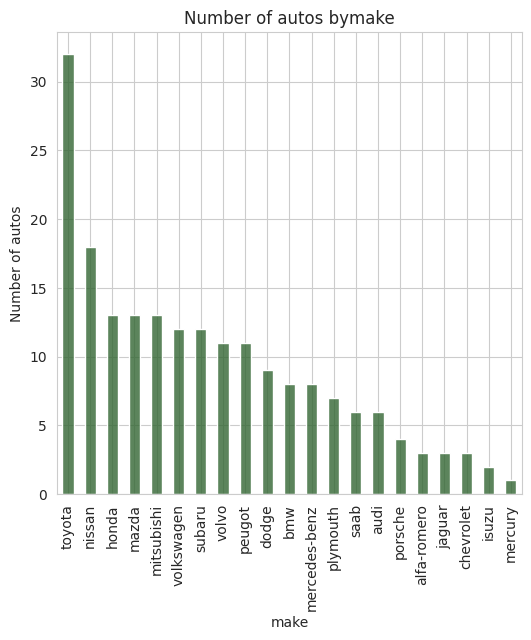

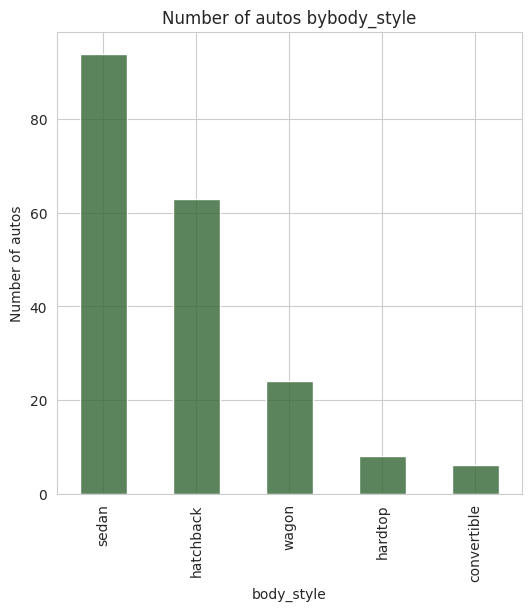

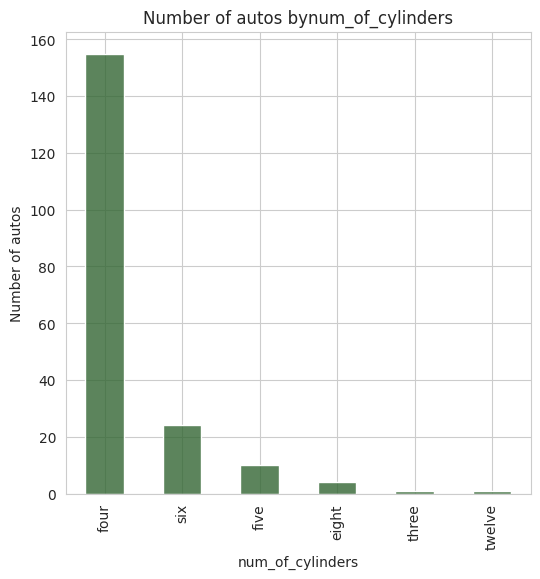

In [38]:

def plot_bars(auto_prices, cols):
    color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         .8 # transparency
         )
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis
        counts = auto_prices[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = color) # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bars(auto_prices, plot_cols)



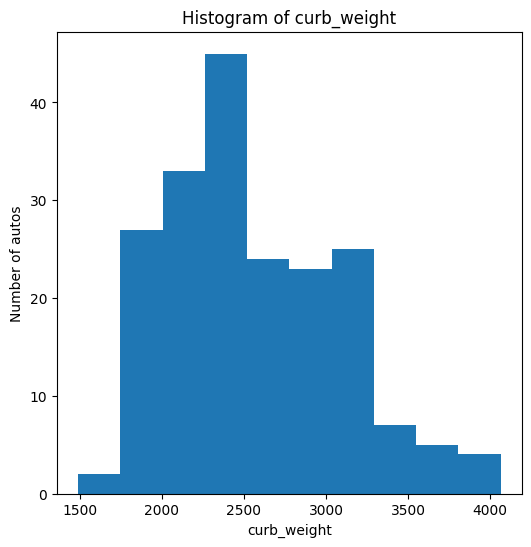

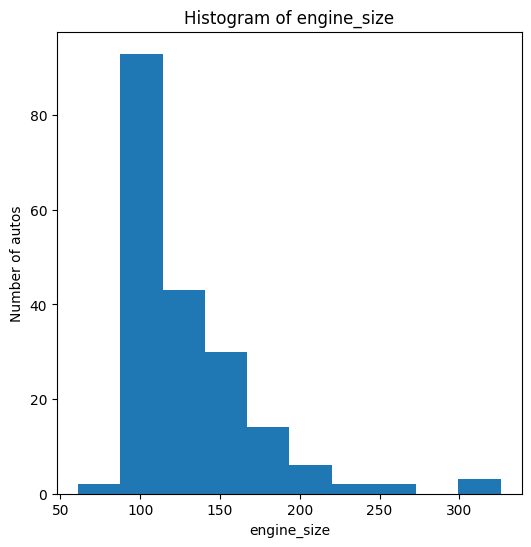

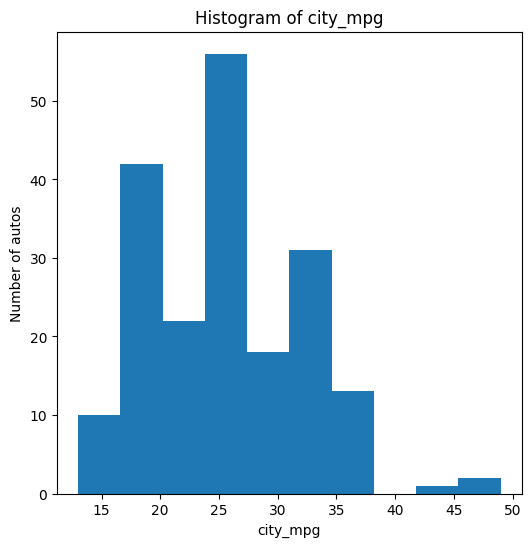

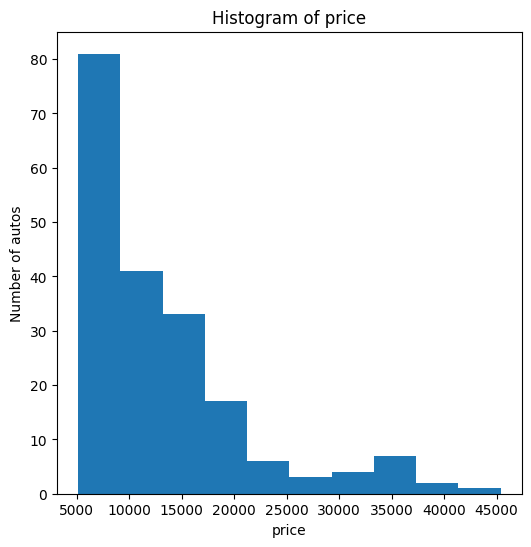

In [11]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']
plot_histogram(auto_prices, num_cols)



<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


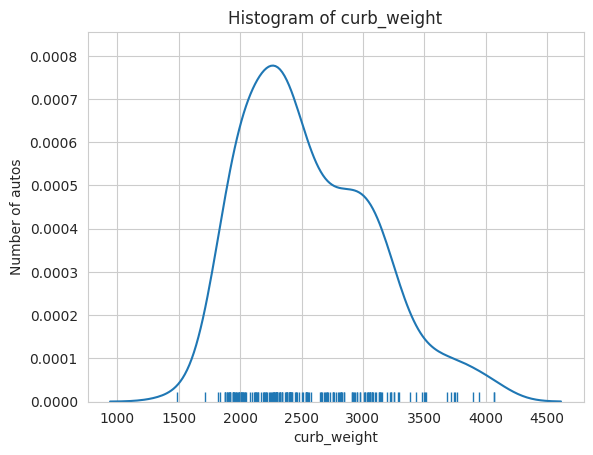

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


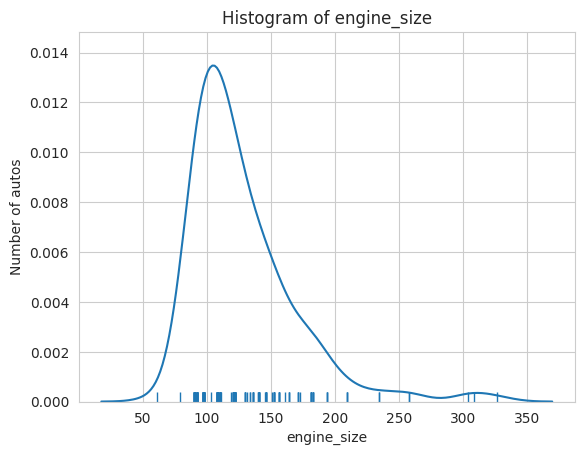

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


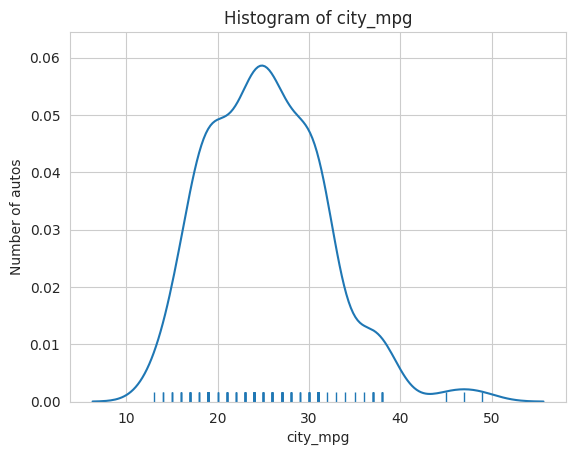

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


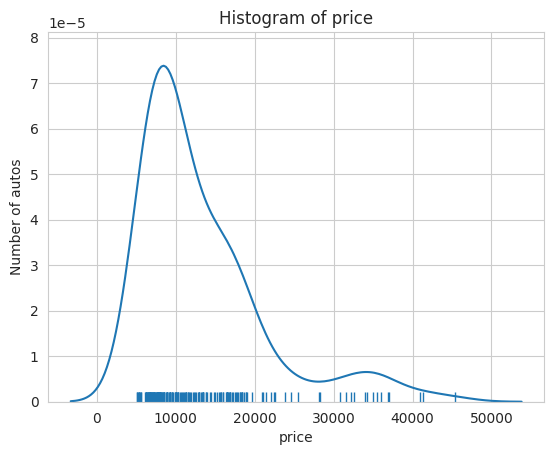

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


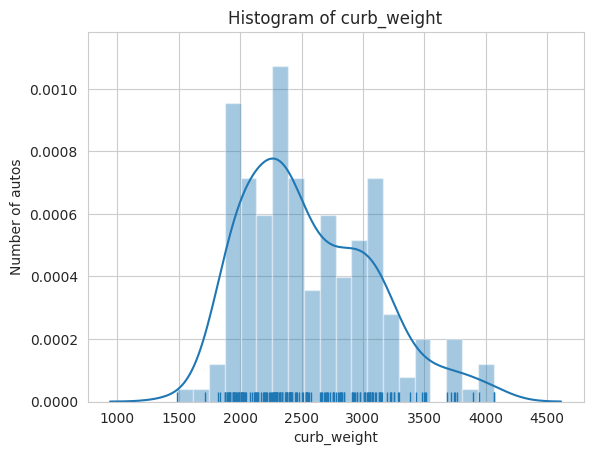

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


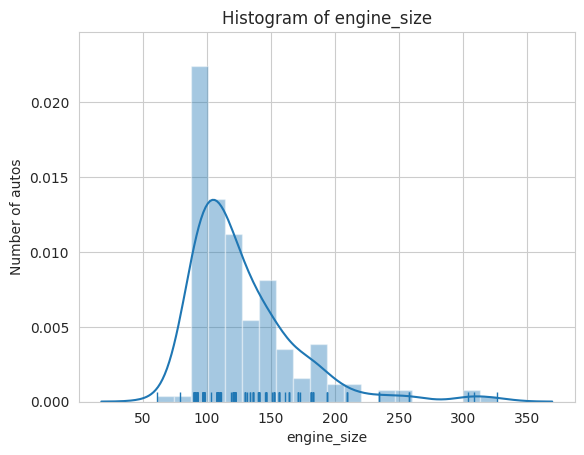

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


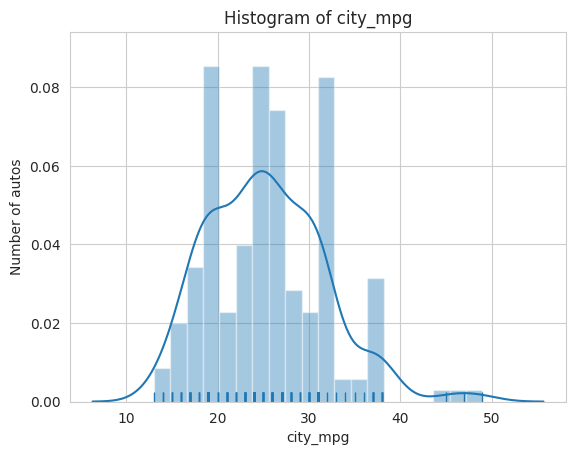

<ipython-input-12-7018b30895f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)


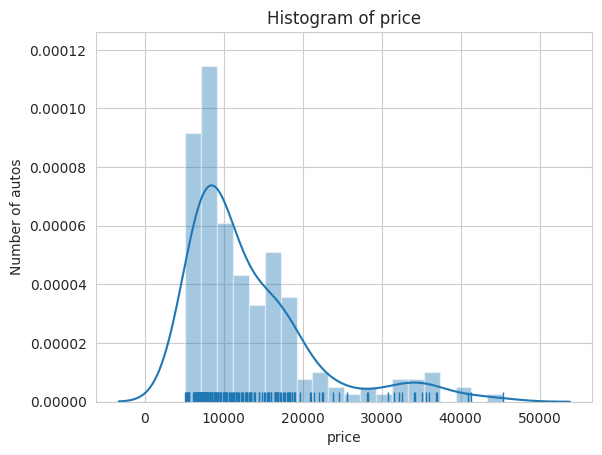

In [12]:
def plot_density_hist(auto_prices, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()

plot_density_hist(auto_prices, num_cols)

plot_density_hist(auto_prices, num_cols, bins = 20, hist = True)



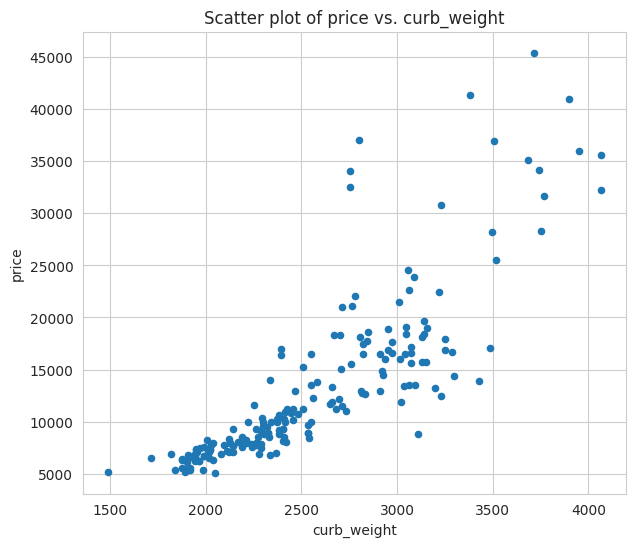

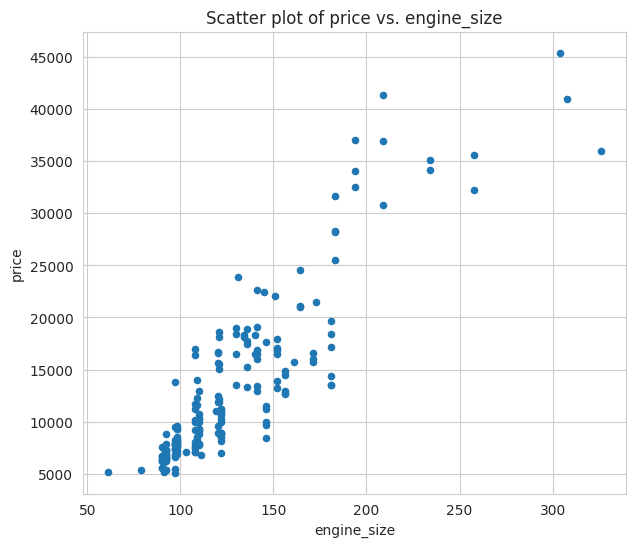

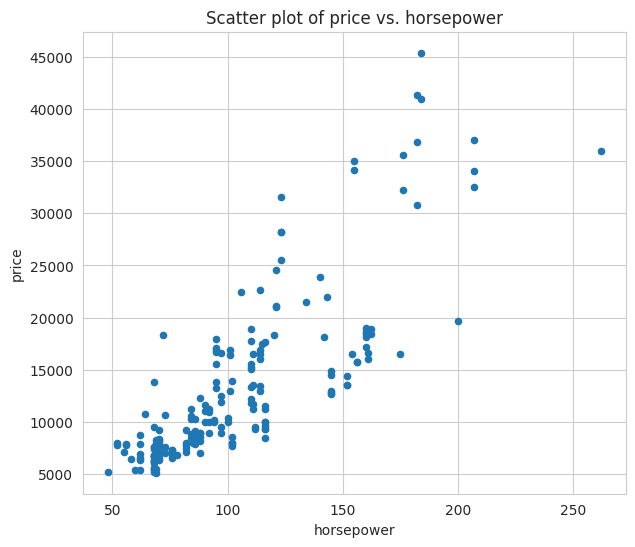

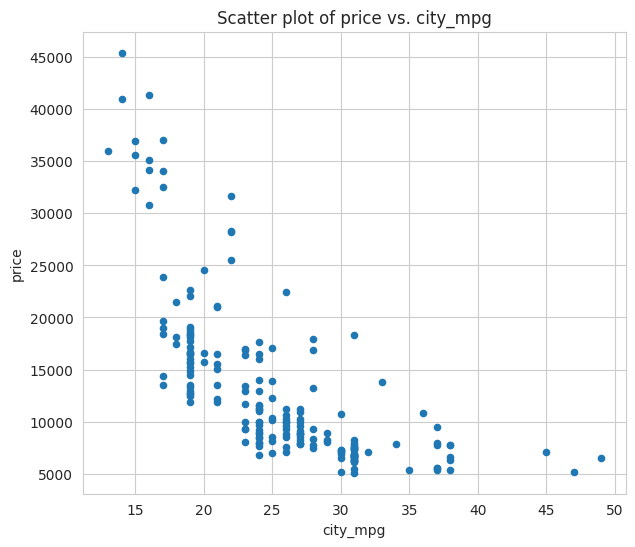

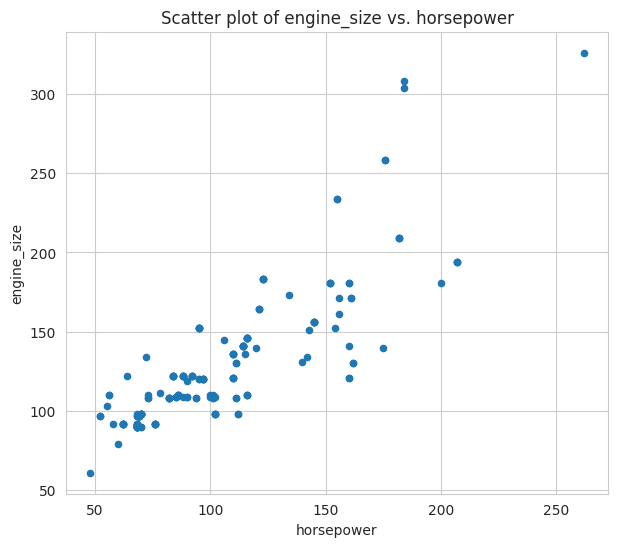

In [13]:
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)

plot_scatter(auto_prices, ['horsepower'], 'engine_size')



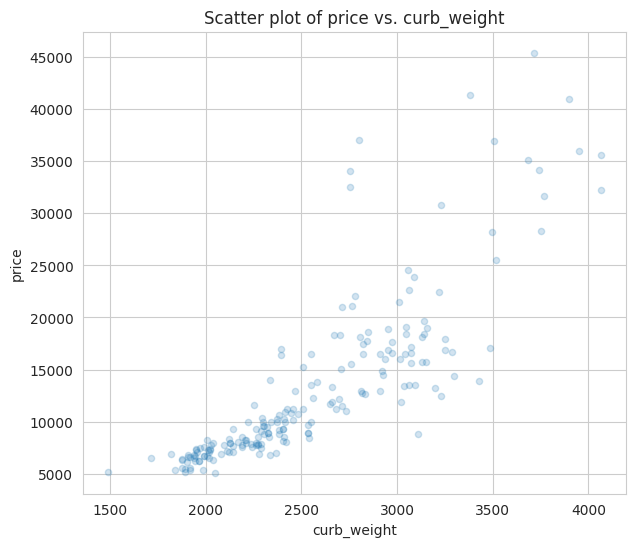

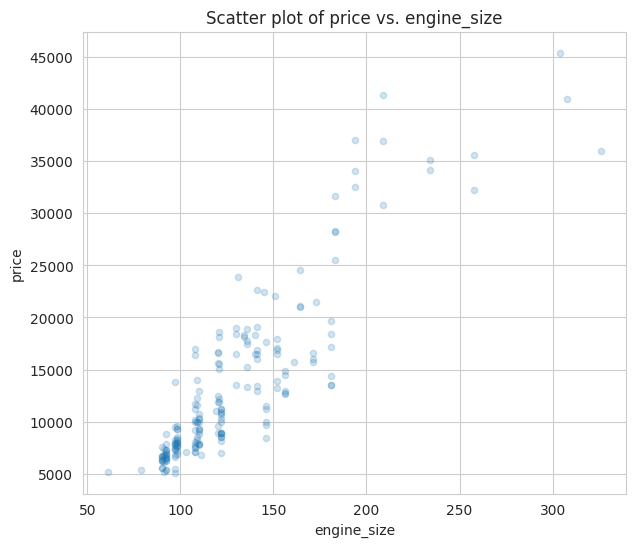

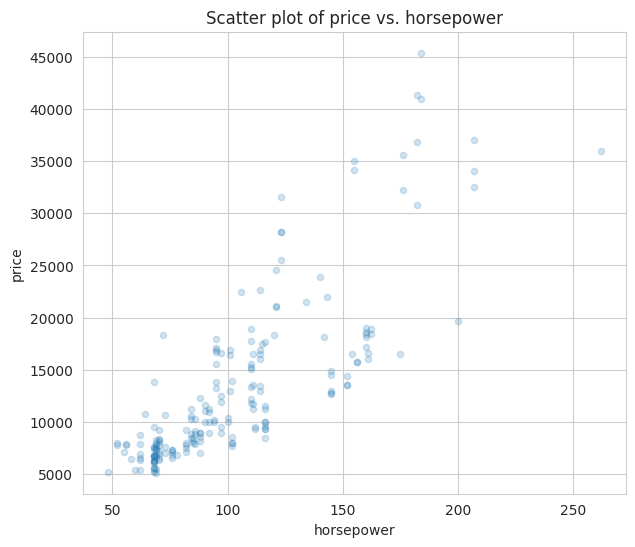

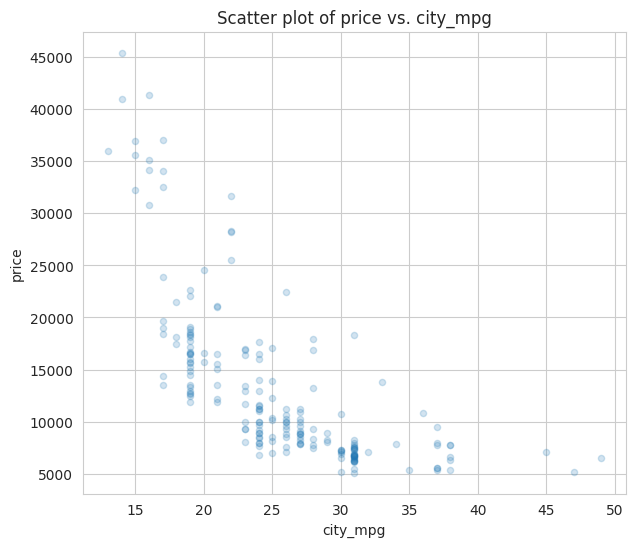

In [14]:
def plot_scatter_t(auto_prices, cols, col_y = 'price', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(auto_prices, num_cols, alpha = 0.2)



In [16]:
# def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='kde'):
#     for col in cols:
#         sns.set_style("whitegrid")
#         sns.jointplot(col, col_y, data=auto_prices, kind=kind)
#         plt.xlabel(col) # Set text for the x axis
#         plt.ylabel(col_y)# Set text for y axis
#         plt.show()

# plot_desity_2d(auto_prices, num_cols)

# plot_desity_2d(auto_prices, num_cols, kind = 'hex')



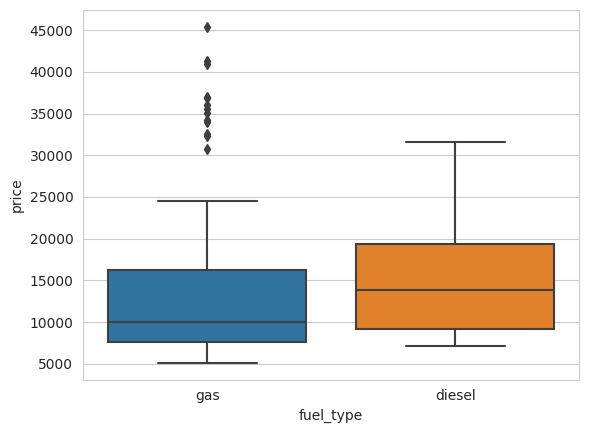

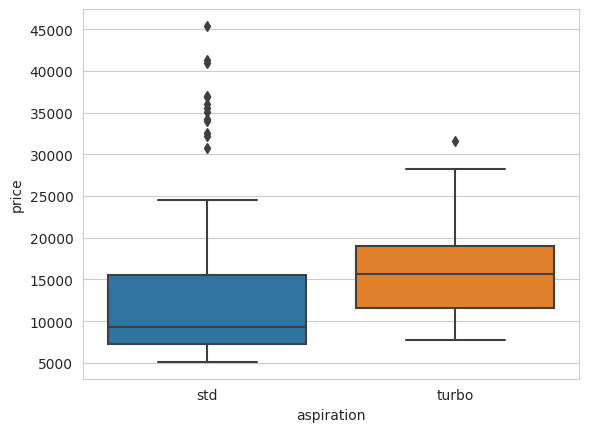

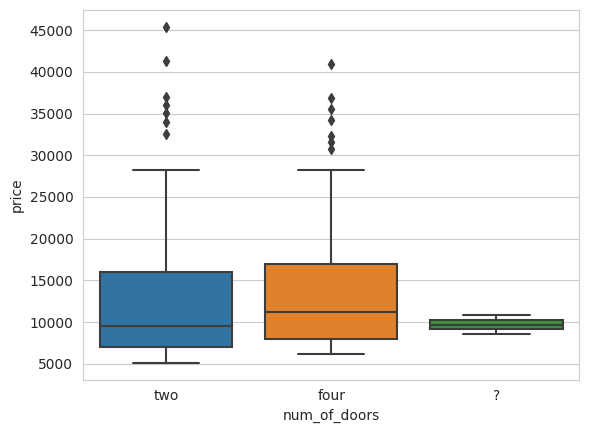

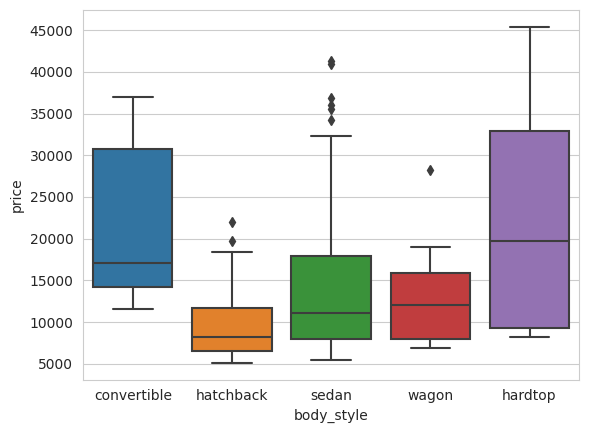

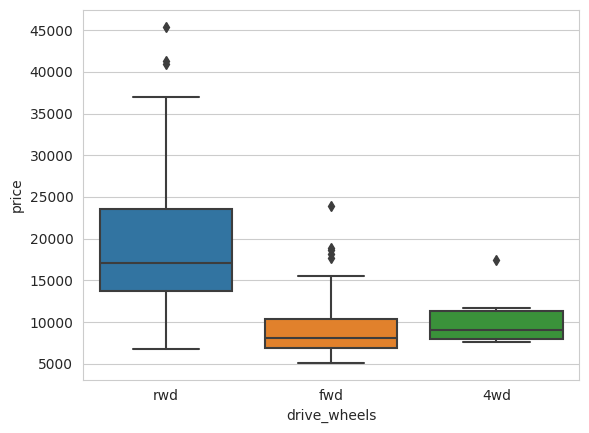

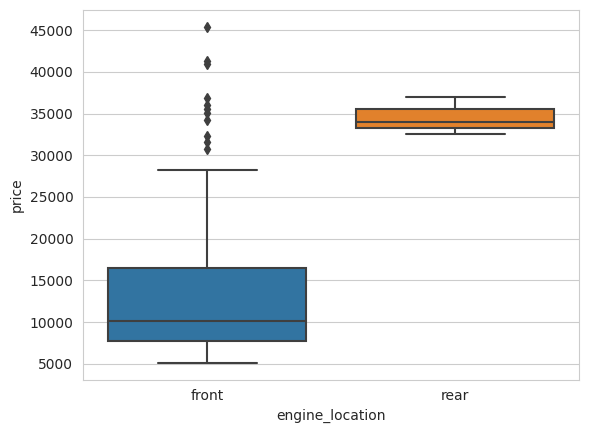

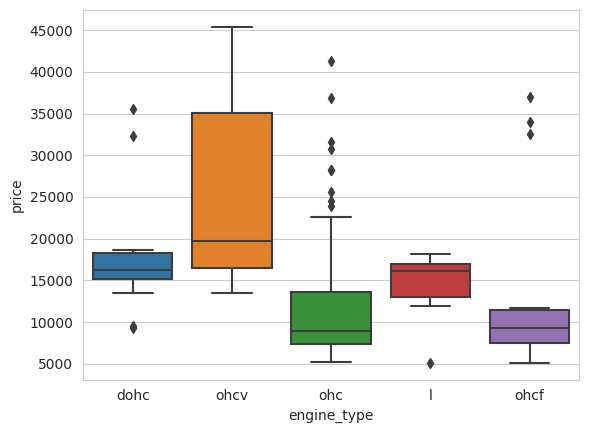

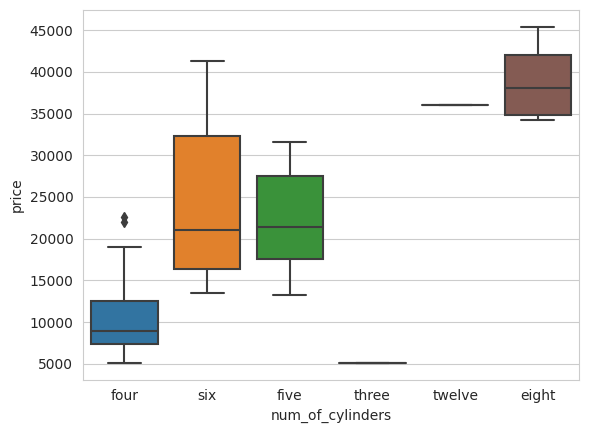

In [19]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot( data=auto_prices,x =  col, y = col_y)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style',
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']
plot_box(auto_prices, cat_cols)



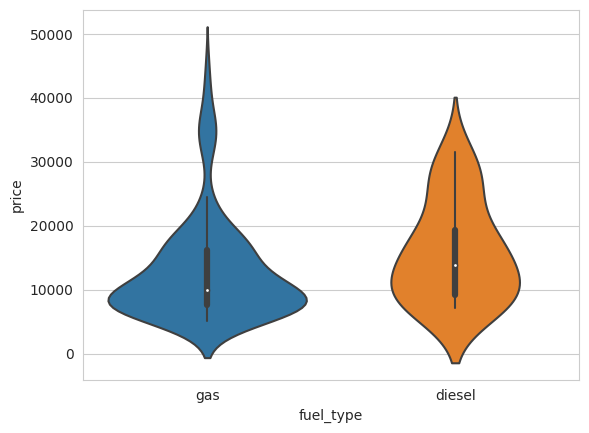

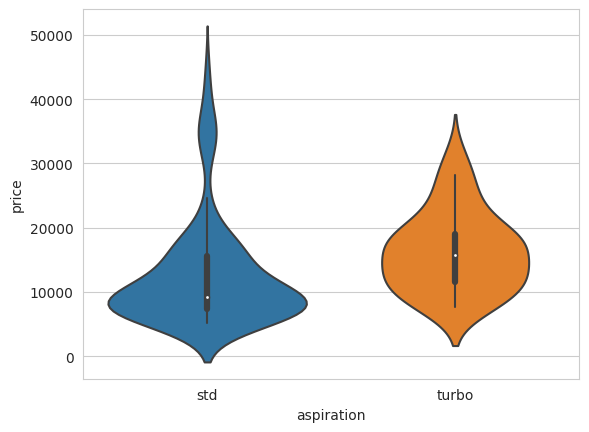

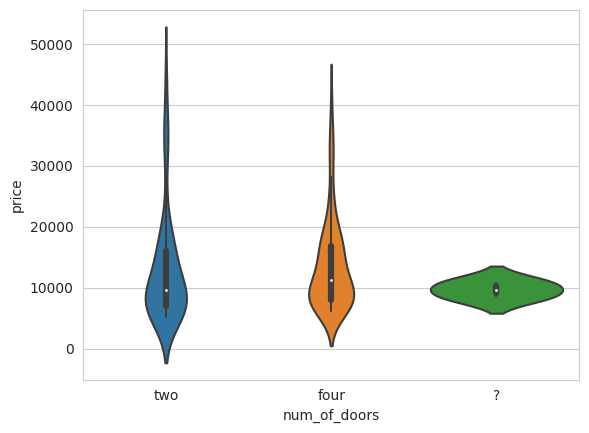

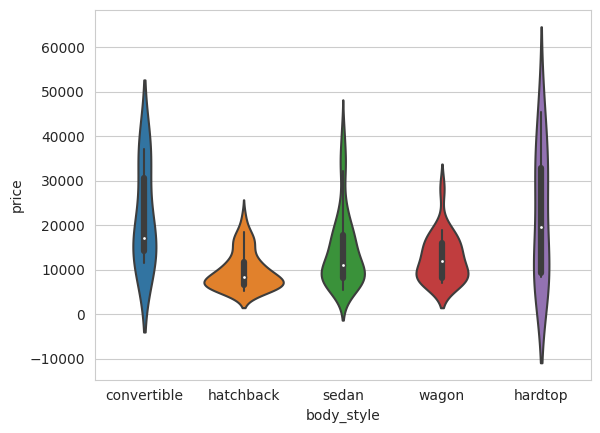

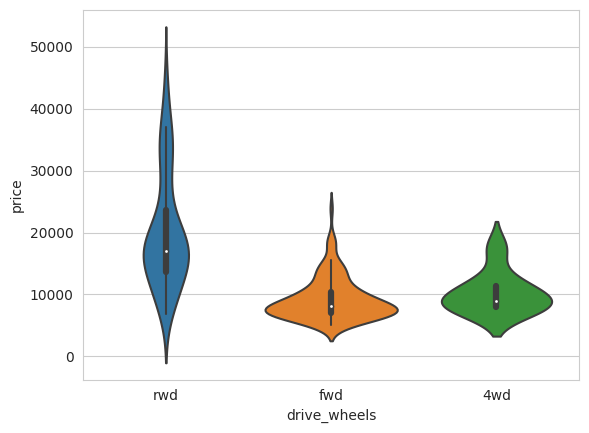

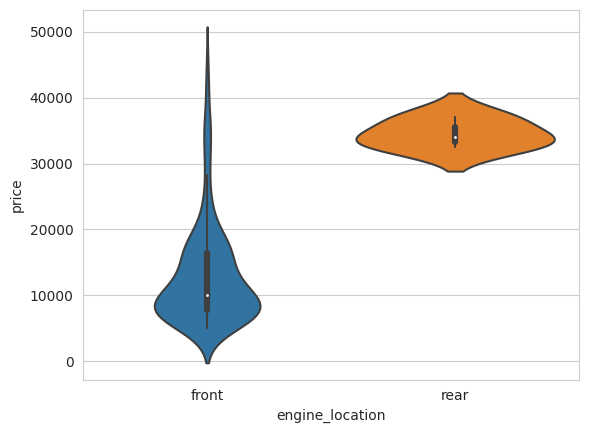

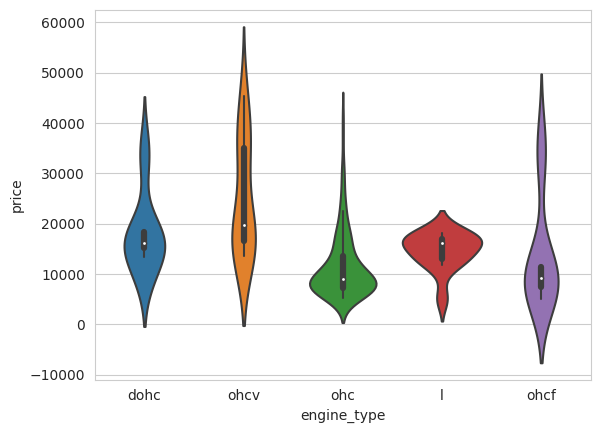

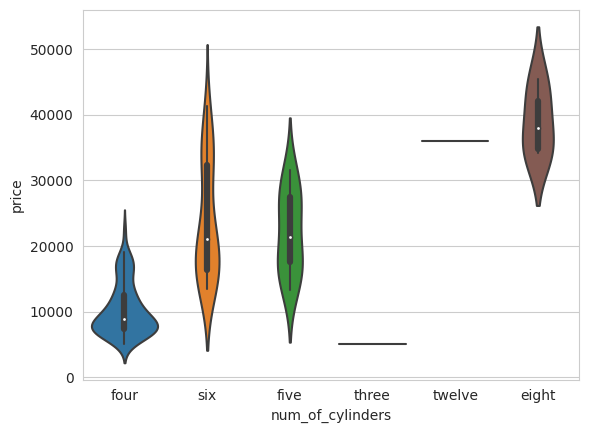

In [21]:
def plot_violin(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(data=auto_prices,x =  col, y = col_y)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_violin(auto_prices, cat_cols)




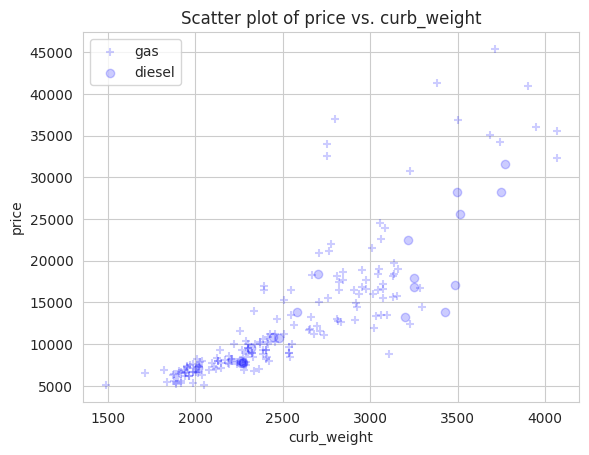

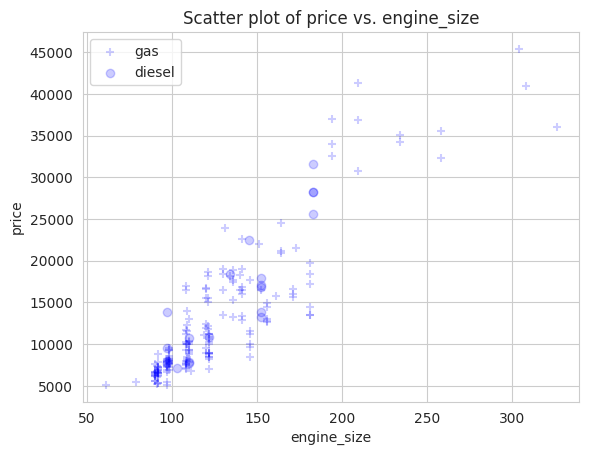

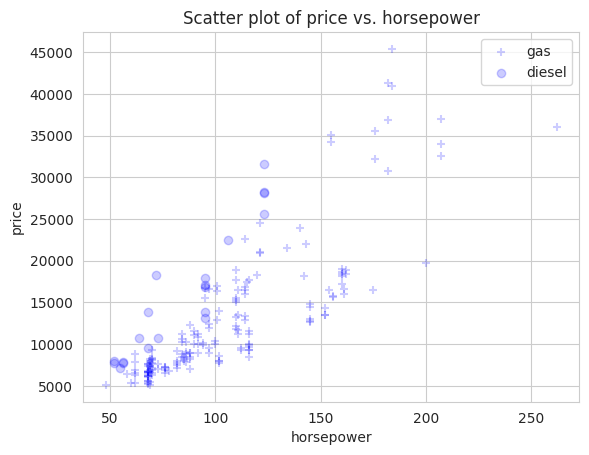

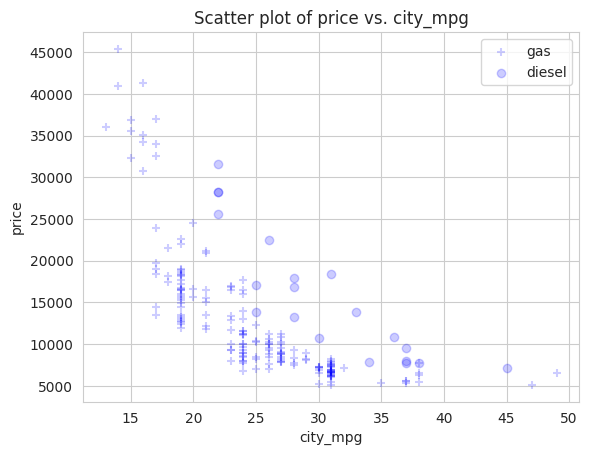

In [23]:
def plot_scatter_shape(auto_prices, cols, shape_col = 'fuel_type', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(data=temp,x =  col, y = col_y, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape(auto_prices, num_cols)







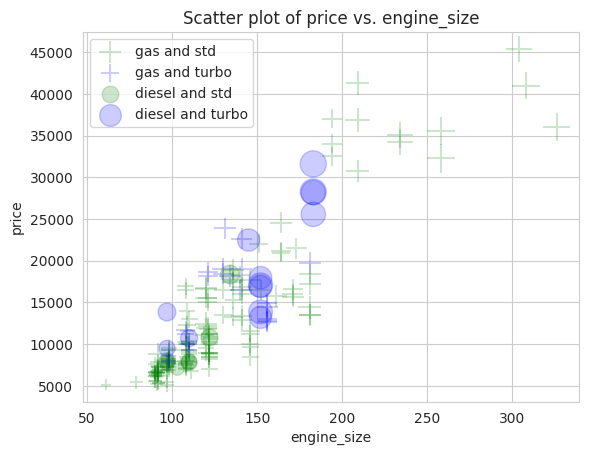

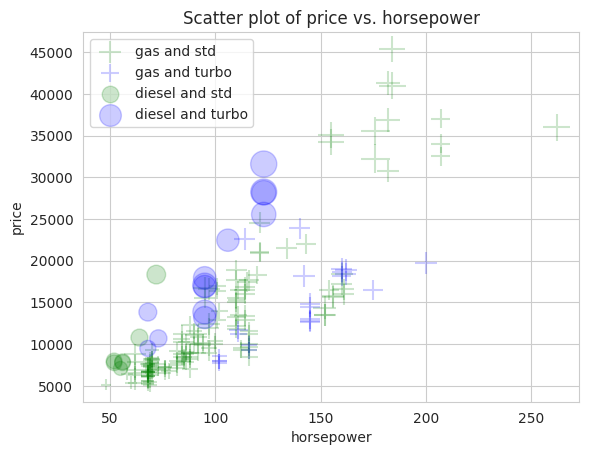

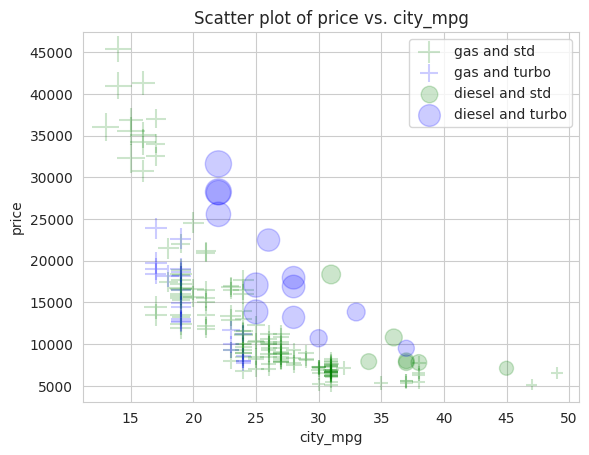

In [25]:
def plot_scatter_shape_size_col(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, color_col = 'aspiration', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray'] # specify distinctive colors
    unique_cats = auto_prices[shape_col].unique()
    unique_colors = auto_prices[color_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            for j, color in enumerate(unique_colors):
                temp = auto_prices[(auto_prices[shape_col] == cat) & (auto_prices[color_col] == color)]
                sns.regplot(data=temp,x =  col, y = col_y, marker = shapes[i],
                            scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2},
                            label = (cat + ' and ' + color), fit_reg = False, color = colors[j])
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape_size_col(auto_prices, num_cols)


'drive_wheels'

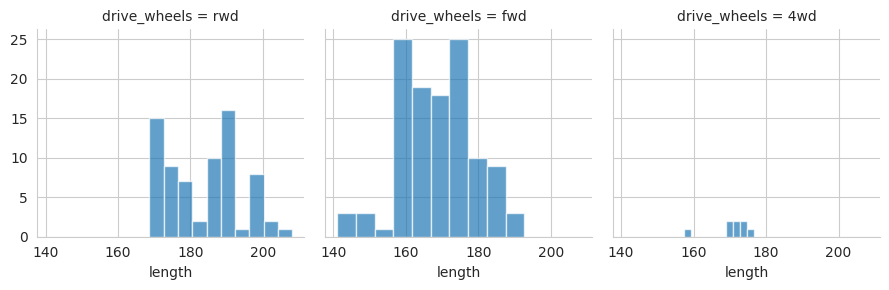

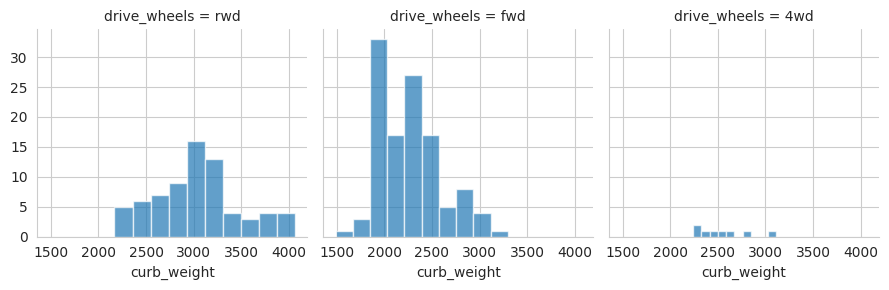

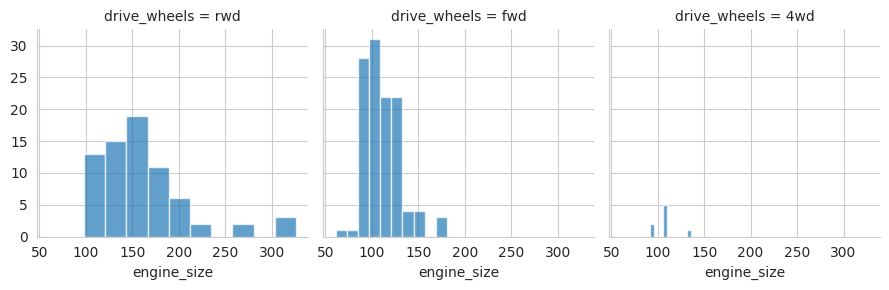

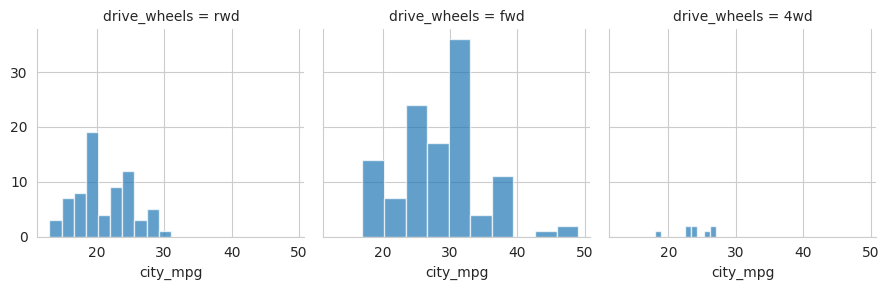

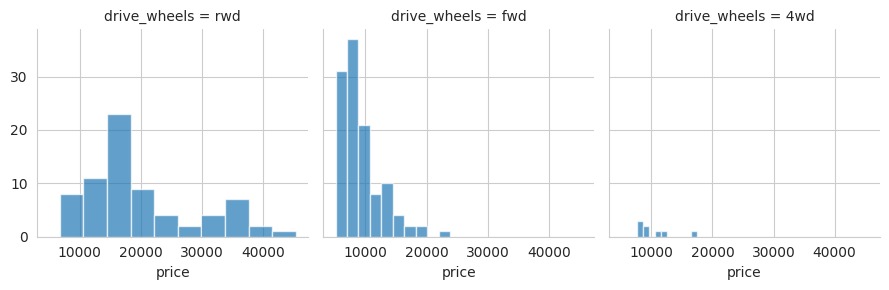

In [33]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb_weight",
               "engine_size",
               "city_mpg",
               "price"]

cond_hists(auto_prices, plot_cols2, 'drive_wheels')





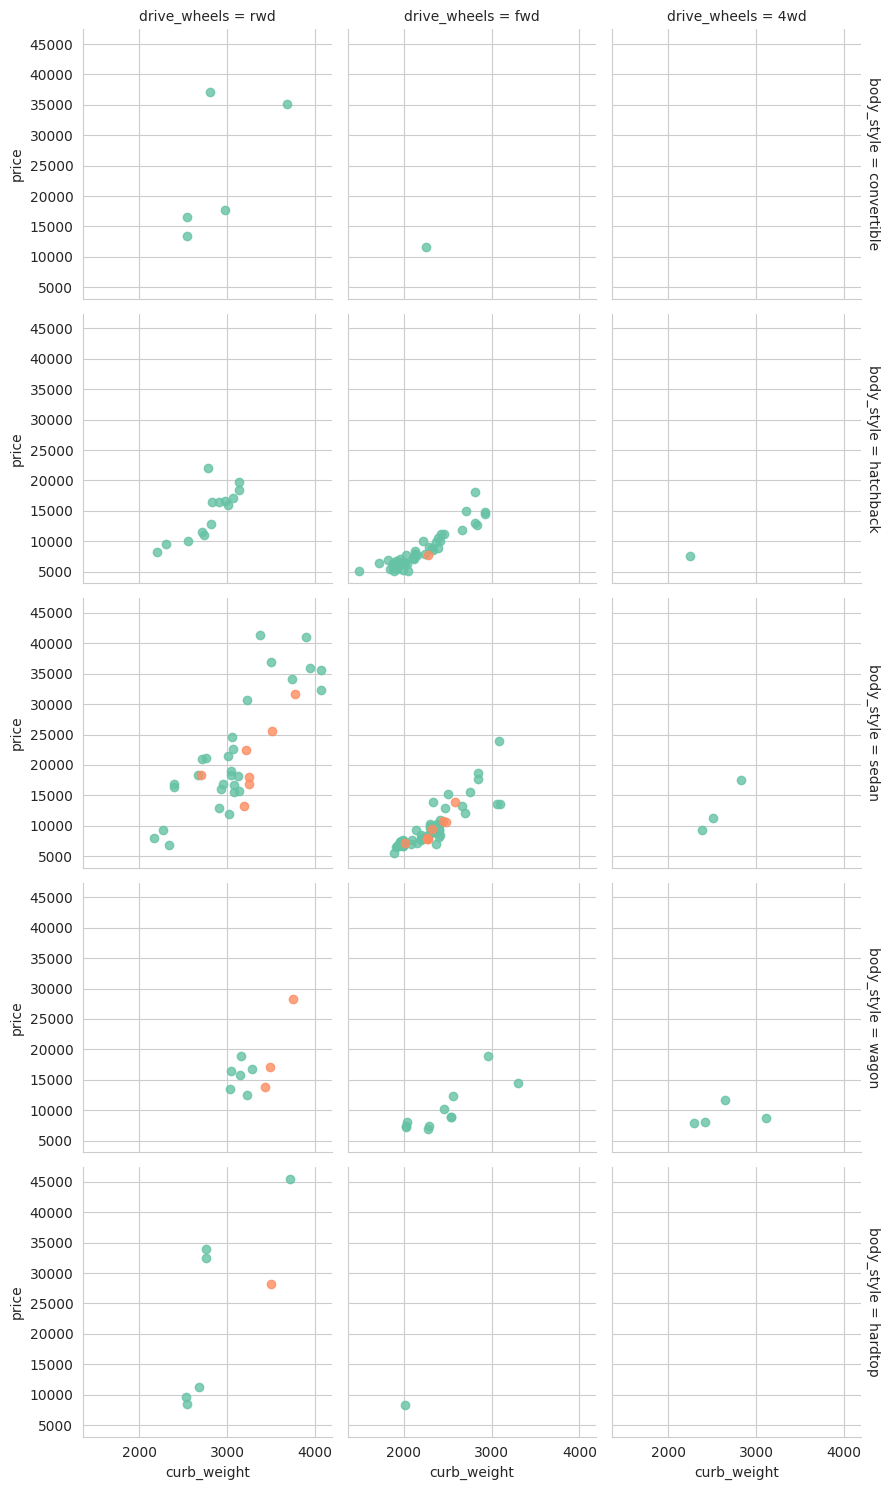

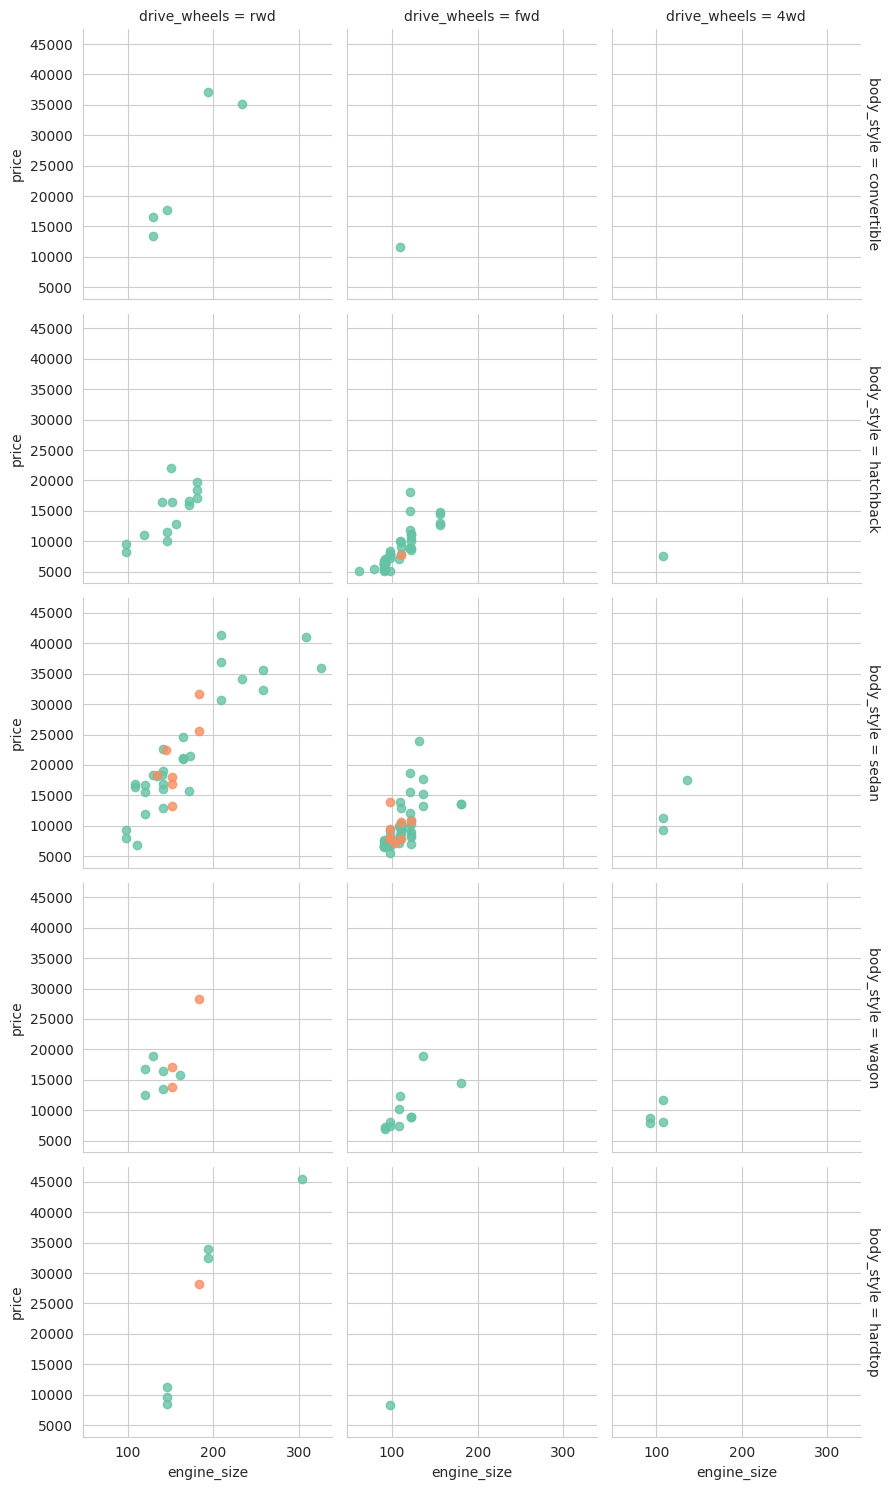

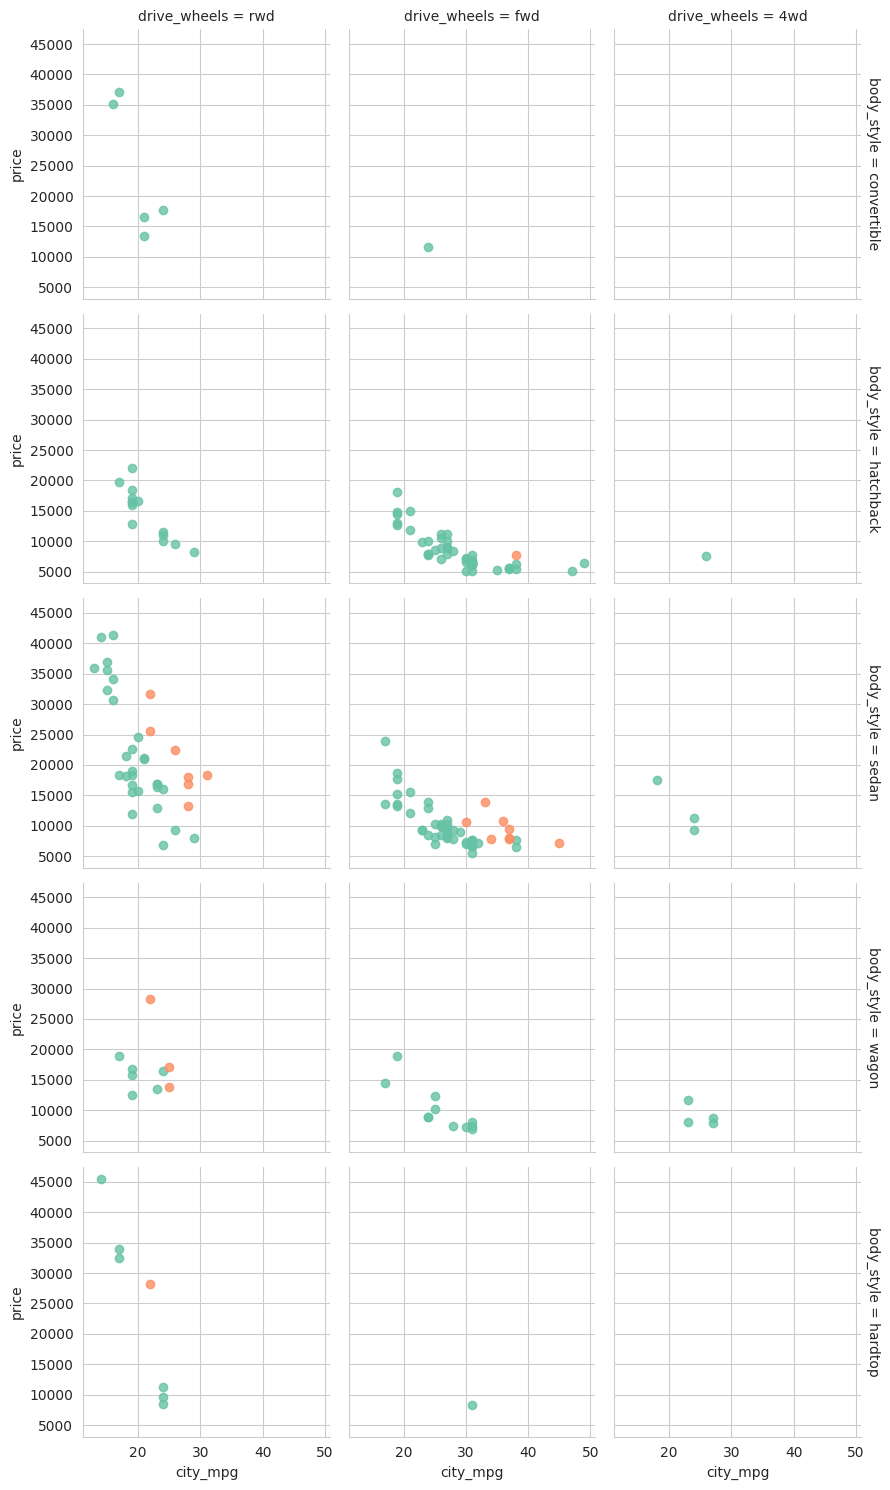

In [34]:
def cond_plot(cols):
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row = 'body_style',
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)

num_cols = ["curb_weight", "engine_size", "city_mpg"]
cond_plot(num_cols)

